# Data Analysis of the House Prices Dataset

## Import all Libraries

In [1]:
# pandas: handle the datasets in the pandas dataframe for data processing and analysis
import pandas as pd
print("pandas version: {}". format(pd.__version__))

# matplotlib: standard library to create visualizations
import matplotlib
import matplotlib.pyplot as plt
print("matplotlib version: {}". format(matplotlib.__version__))

# seaborn: advanced visualization library to create more advanced charts
import seaborn as sns
print("seaborn version: {}". format(sns.__version__))

# turn off warnings for better reading in the Jupyter notebbok
pd.options.mode.chained_assignment = None  # default='warn'

# show all columns of the pandas dataframe in the jupyter console
pd.set_option('display.max_columns', None)

pandas version: 1.4.1
matplotlib version: 3.4.2
seaborn version: 0.11.2


## Load the Training and Test Dataset

In [2]:
# load training and test dataset
df_train = pd.read_csv('../01_rawdata/train.csv', index_col = "Id")
df_test = pd.read_csv('../01_rawdata/test.csv', index_col = "Id")

df_train.name = "df_train"
df_test.name = "df_test"

print("Number of rows in the training dataset: {}".format(df_train.shape[0]))
print("Number of columns in the training dataset: {}".format(df_train.shape[1]))
print(50*"-")
print("Number of rows in the test dataset: {}".format(df_test.shape[0]))
print("Number of columns in the test dataset: {}".format(df_test.shape[1]))

Number of rows in the training dataset: 1460
Number of columns in the training dataset: 80
--------------------------------------------------
Number of rows in the test dataset: 1459
Number of columns in the test dataset: 79


There is only one column more in the training dataset compared to the test dataset. We have to prove if there is only one additional column in the training dataset.
In this case this column can only be the SalePrice that is our target variable.

In [3]:
def column_diff(df1, df2):
	'''
	Prints the columns that are different for two pandas dataframes.

		Parameters:
			df1 (pandas dataframe): A random pandas dataframe
			df2 (pandas dataframe): A random pandas dataframe

		Returns:
			nothing
	'''
    
	print("Columns in " + str(df1.name) + " not in " + str(df2.name))
	print(df1.columns.difference(df2.columns))
	print(50*"-")
	print("Columns in " + str(df2.name) + " not in " + str(df1.name))
	print(df2.columns.difference(df1.columns))

column_diff(df_train, df_test)

Columns in df_train not in df_test
Index(['SalePrice'], dtype='object')
--------------------------------------------------
Columns in df_test not in df_train
Index([], dtype='object')


In [4]:
print(column_diff.__doc__)


	Prints the columns that are different for two pandas dataframes.

		Parameters:
			df1 (pandas dataframe): A random pandas dataframe
			df2 (pandas dataframe): A random pandas dataframe

		Returns:
			nothing
	


From the function that shows the difference in columns between two dataframes, we see that only the column SalePrice is in df_train but not in df_test. Therfore we do not have to drop other missing columns that are in the training set but not in the test set when we train the regression model.

## Take a First Look at the Datasets

In [5]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


- The first column Id is an idenfifier that we can delete during the csv read function
- There are multiple columns with NaN values -> we have to deal with missing values

### Compare Training and Test dataset for numerical features

In [7]:
df_train_describe_num = df_train.describe().transpose() # for numerical features
df_test_describe_num = df_test.describe().transpose() # for numerical features

df_describe_num = pd.merge(df_train_describe_num, df_test_describe_num, left_index=True, right_index=True, suffixes=('_train', '_test'))
df_describe_num

,count_train,mean_train,std_train,min_train,25%_train,50%_train,75%_train,max_train,count_test,mean_test,std_test,min_test,25%_test,50%_test,75%_test,max_test
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0,1459.0,57.378341,42.746880,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0,1232.0,68.580357,22.376841,21.0,58.00,67.0,80.00,200.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0,1459.0,9819.161069,4955.517327,1470.0,7391.00,9399.0,11517.50,56600.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0,1459.0,6.078821,1.436812,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0,1459.0,5.553804,1.113740,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0,1459.0,1971.357779,30.390071,1879.0,1953.00,1973.0,2001.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0,1459.0,1983.662783,21.130467,1950.0,1963.00,1992.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0,1444.0,100.709141,177.625900,0.0,0.00,0.0,164.00,1290.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0,1458.0,439.203704,455.268042,0.0,0.00,350.5,753.50,4010.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0,1458.0,52.619342,176.753926,0.0,0.00,0.0,0.00,1526.0


### Compare Training and Test dataset for categorical features

In [8]:
df_train_describe_cat = df_train.describe(include=['O']).transpose() # for numerical features
df_test_describe_cat = df_test.describe(include=['O']).transpose() # for numerical features

df_describe_cat = pd.merge(df_train_describe_cat, df_test_describe_cat, left_index=True, right_index=True, suffixes=('_train', '_test'))
df_describe_cat

,count_train,unique_train,top_train,freq_train,count_test,unique_test,top_test,freq_test
MSZoning,1460,5,RL,1151,1455,5,RL,1114
Street,1460,2,Pave,1454,1459,2,Pave,1453
Alley,91,2,Grvl,50,107,2,Grvl,70
LotShape,1460,4,Reg,925,1459,4,Reg,934
LandContour,1460,4,Lvl,1311,1459,4,Lvl,1311
Utilities,1460,2,AllPub,1459,1457,1,AllPub,1457
LotConfig,1460,5,Inside,1052,1459,5,Inside,1081
LandSlope,1460,3,Gtl,1382,1459,3,Gtl,1396
Neighborhood,1460,25,NAmes,225,1459,25,NAmes,218
Condition1,1460,9,Norm,1260,1459,9,Norm,1251


We could use the table to find missing values and differences in the distribution of featues between the training and test dataset. But it is easier to use a function to find missing values in the data preprocessing notebook and plot the numeric and categorical features to find differences in the distribution between the training and test dataset.

## Missing Values

In [9]:
def find_missing_values(df):
    '''
	Find missing values in a pandas dataframes.

		Parameters:
			df (pandas dataframe): A random pandas dataframe

		Returns:
			pandas dataframe that contains information about each feature with missing values
	'''
    
    total = df.isnull().sum().sort_values(ascending=False) # compute the total number of missing values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) # compute the percentage of missing values
    
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # add all information to one dataframe
    missing_data = missing_data[missing_data['Total']>0] # filter the dataframe to only the features with missing values
    
    return missing_data

In [10]:
find_missing_values(df_train)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [11]:
find_missing_values(df_test)

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461
GarageQual,78,0.053461
GarageCond,78,0.053461


The training as well as the test dataset contain some features that have a lot of missing values (>15%) and may be deleted durin the data preprocessing. For the data analysis we keep all features to gain the most insights from the whole dataset.

## Difference between the training and test dataset
Almost all of the features are do not differ between the training and test dataset

In [13]:
df_train["dataset"] = "train"
df_test["dataset"] = "test"

df_concat = pd.concat([df_train, df_test])

### Influence of training and test dataset for categoric features

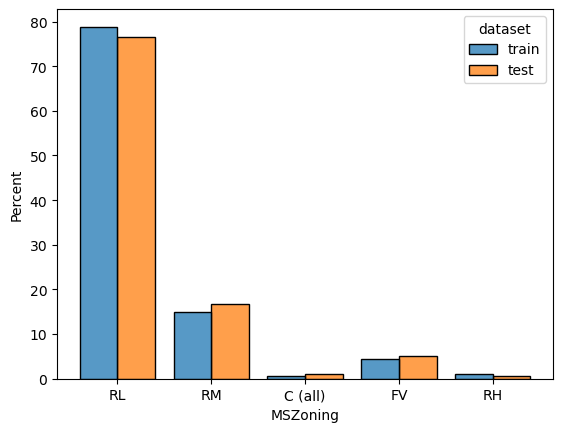

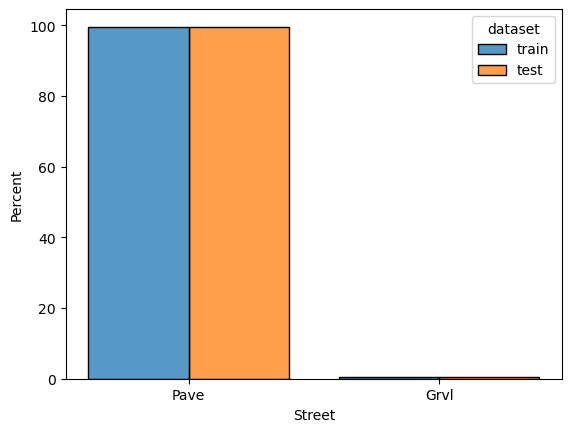

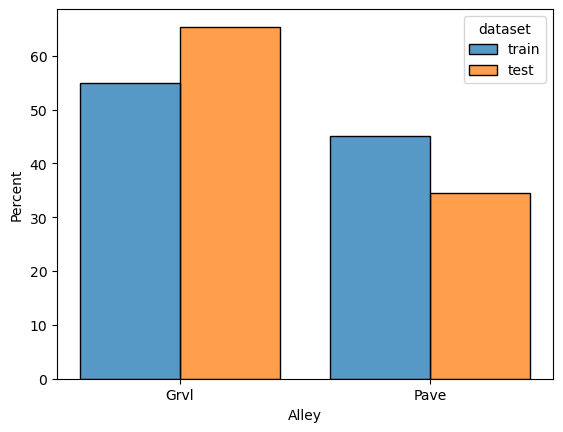

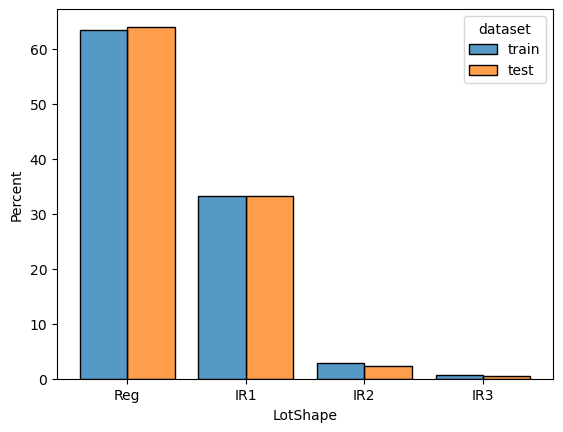

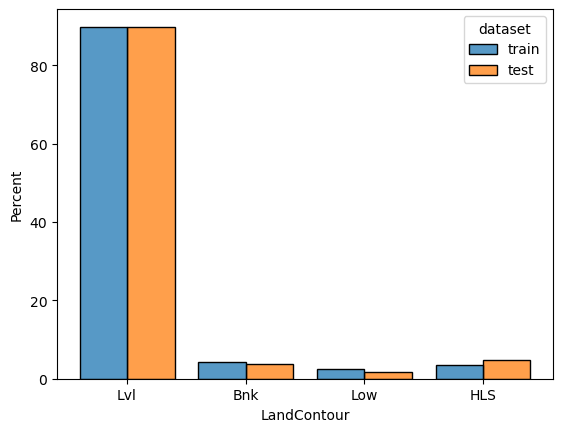

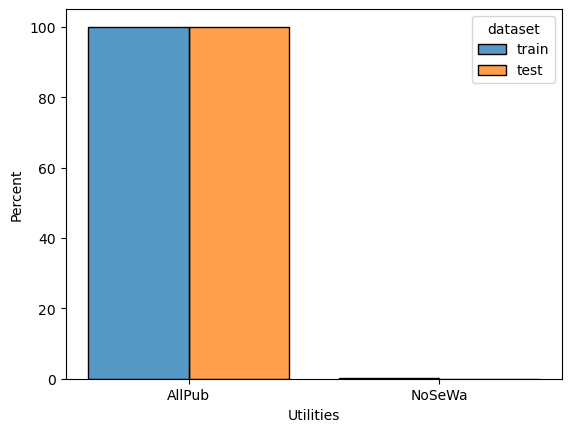

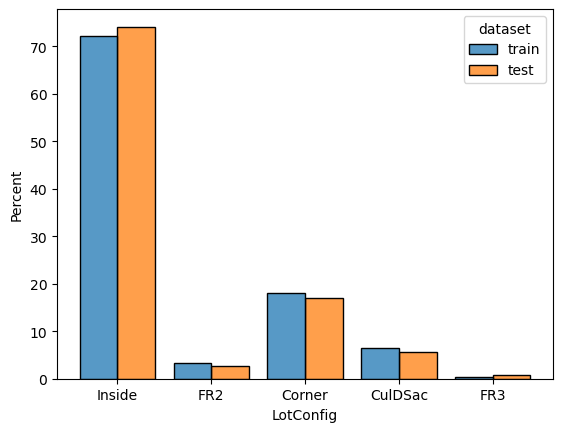

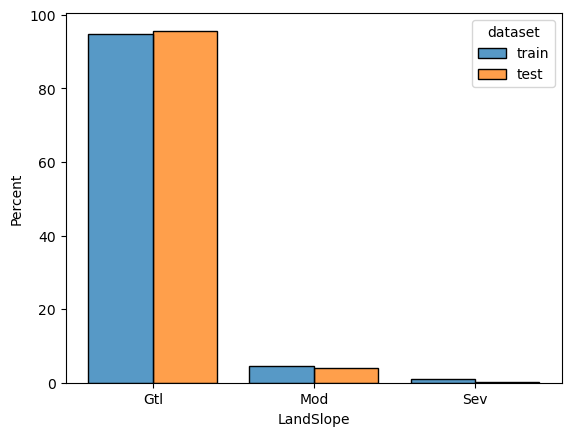

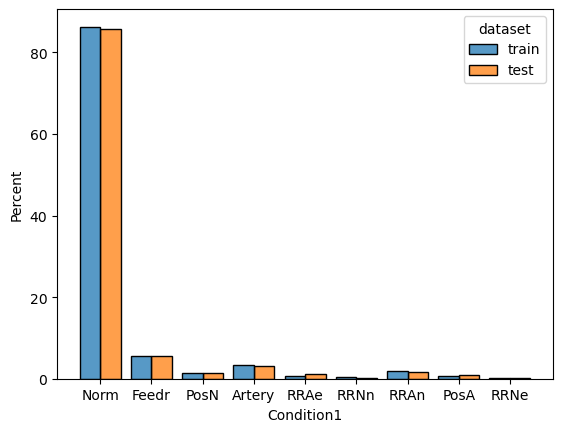

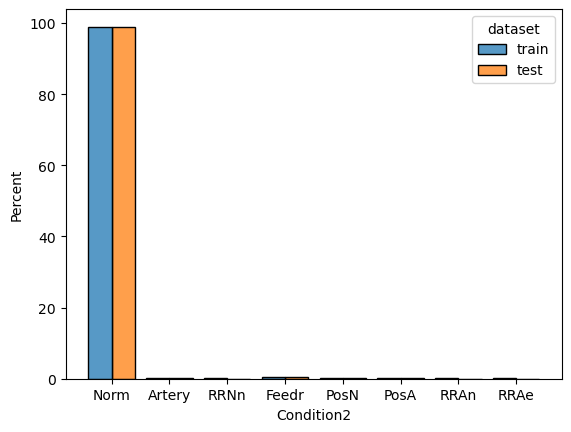

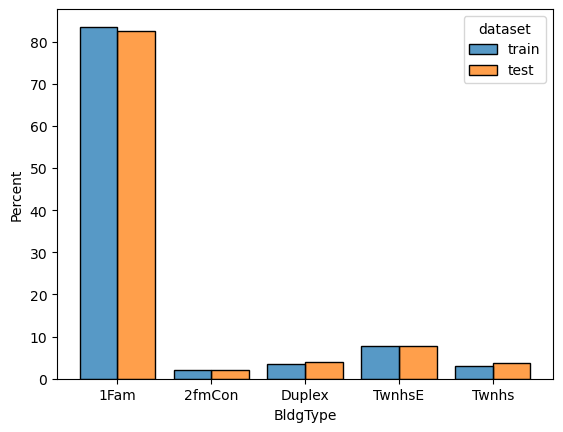

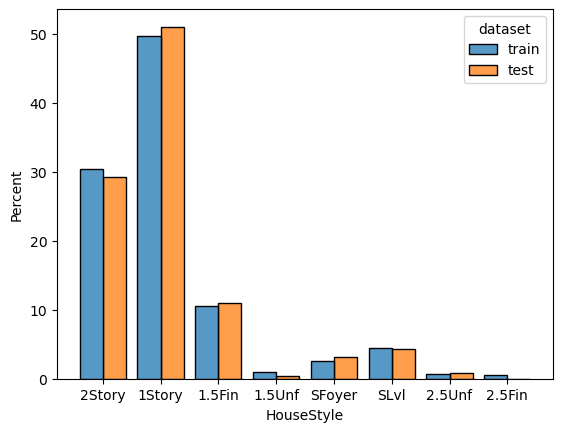

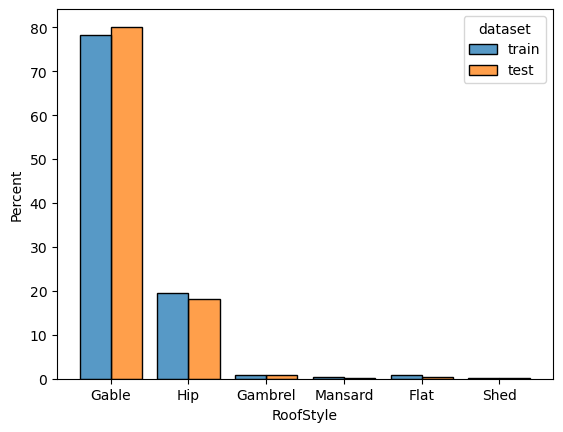

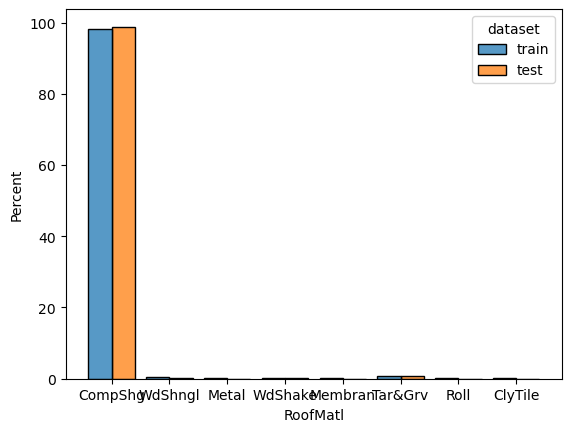

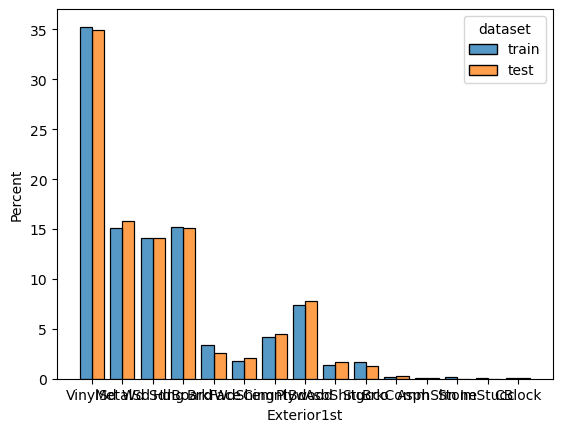

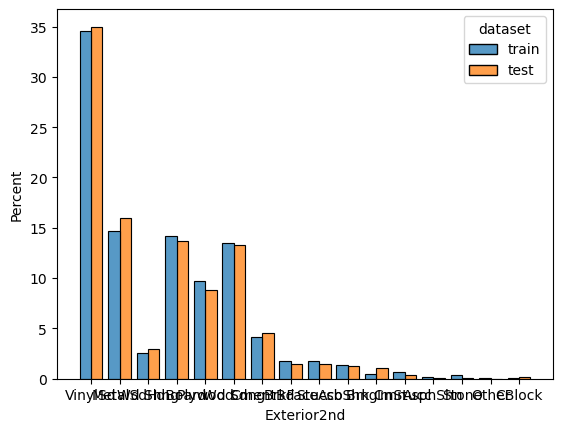

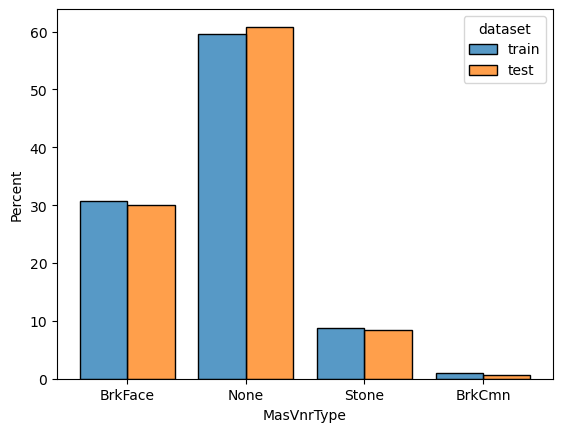

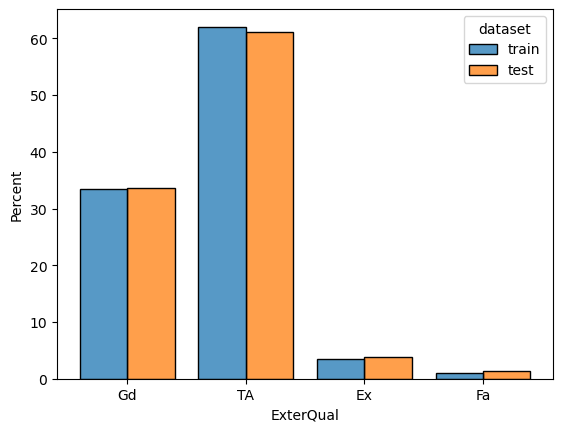

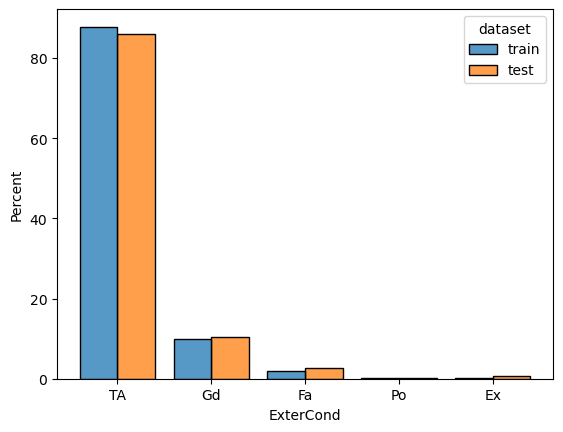

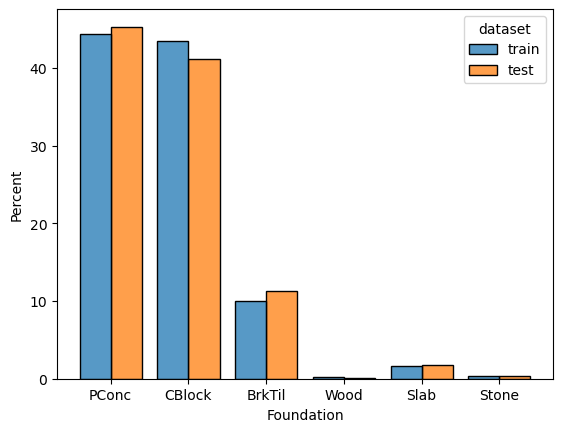

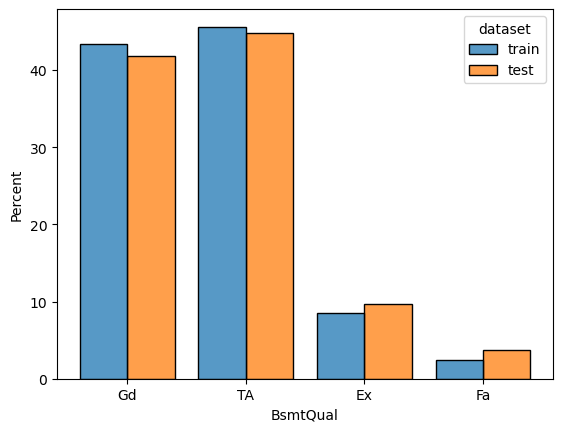

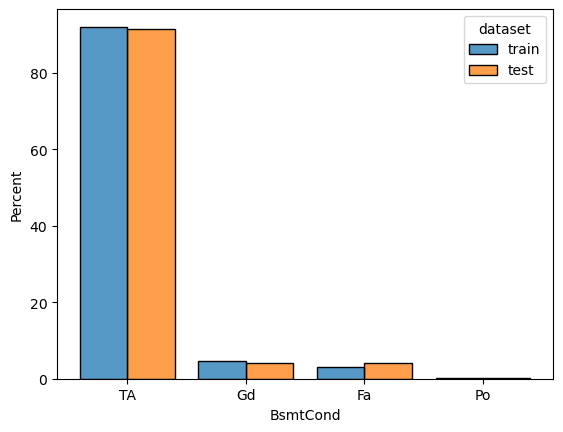

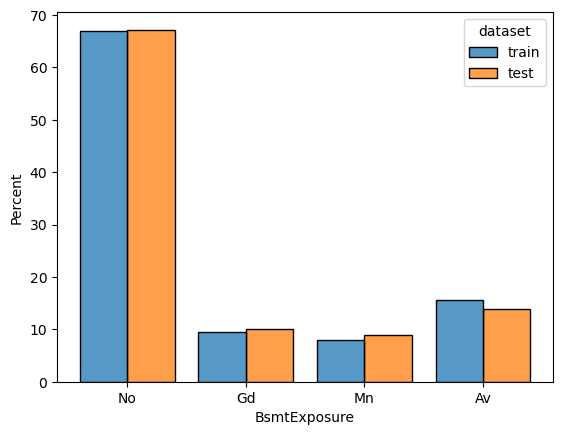

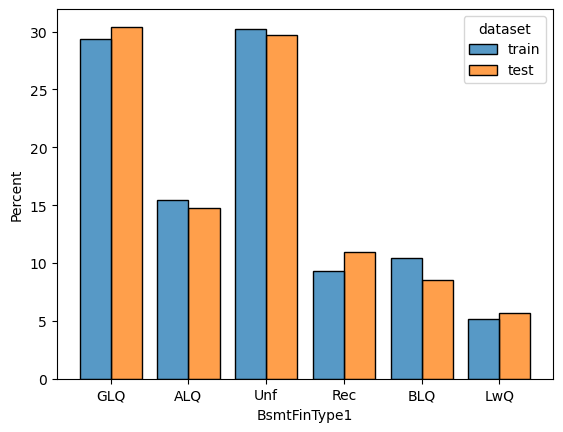

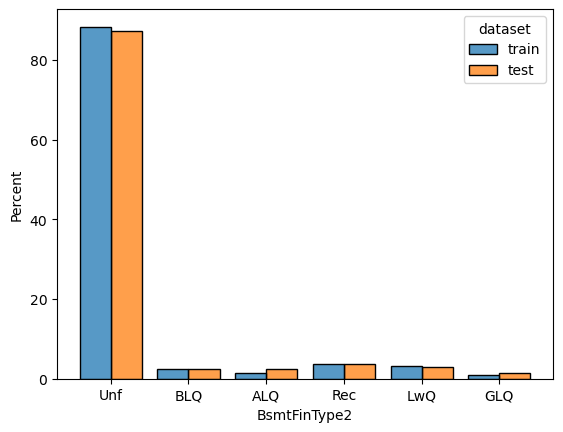

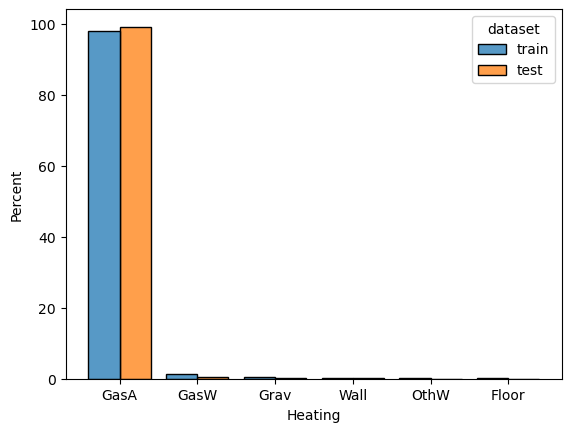

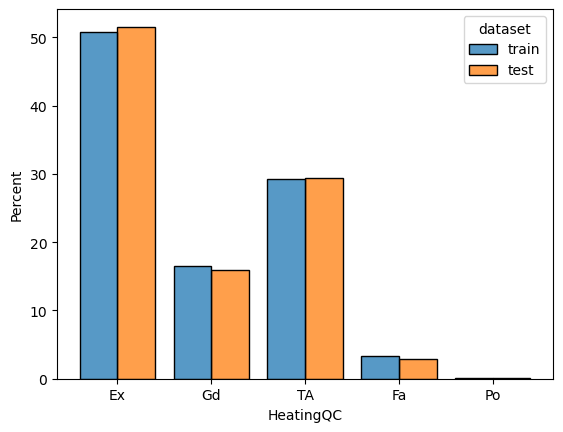

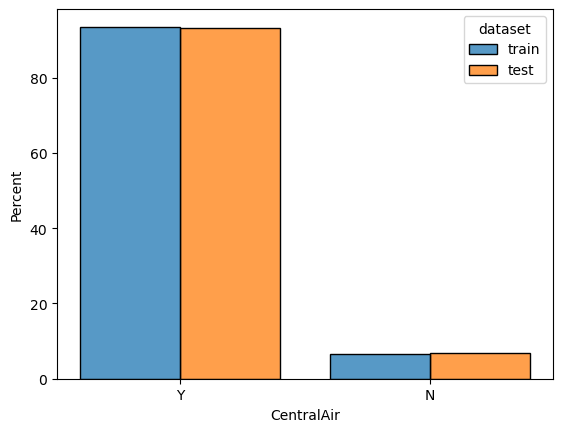

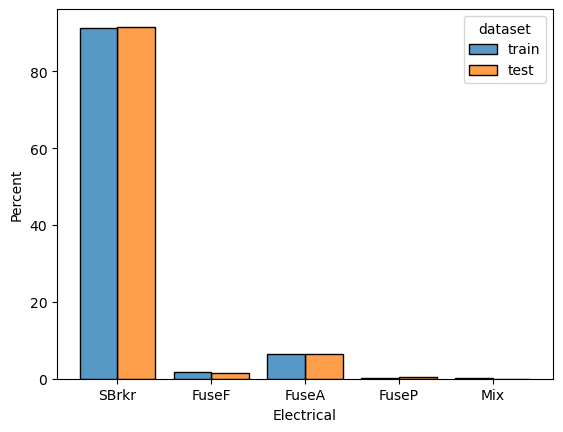

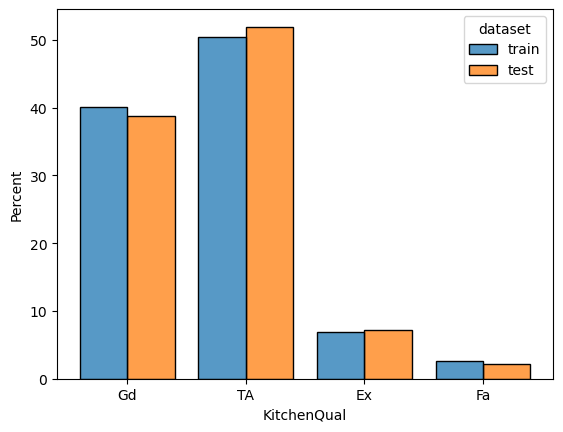

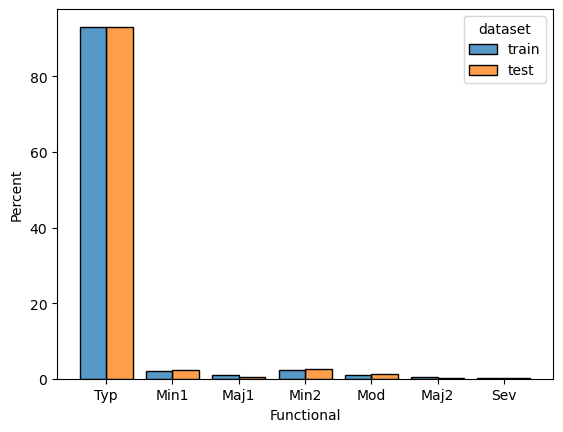

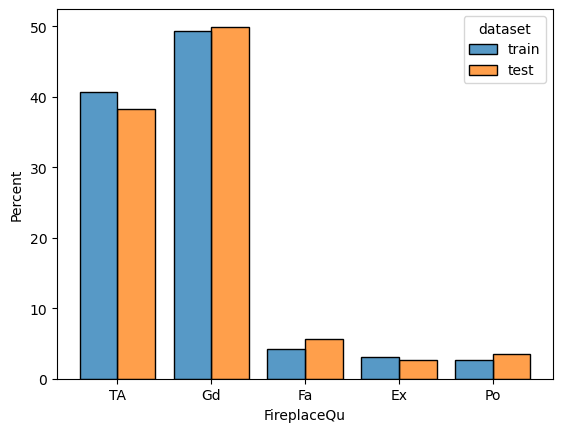

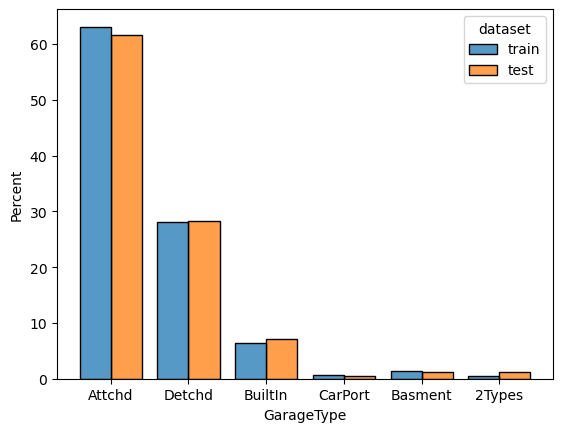

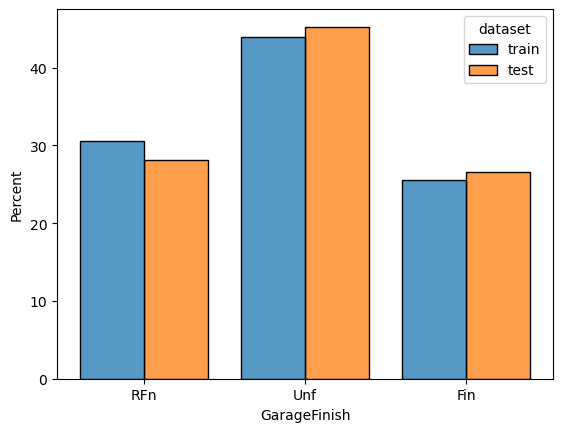

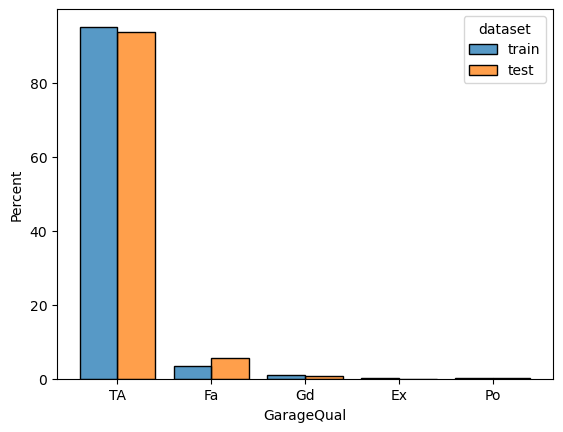

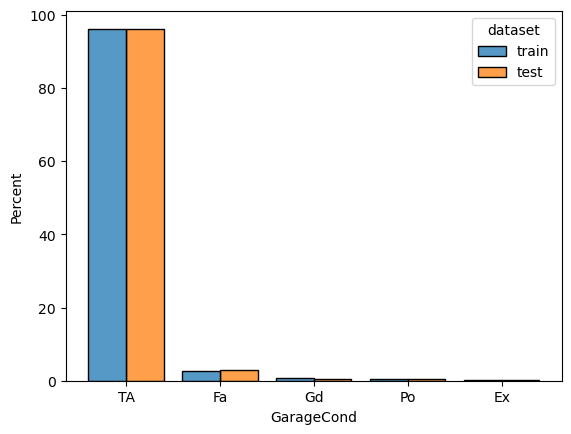

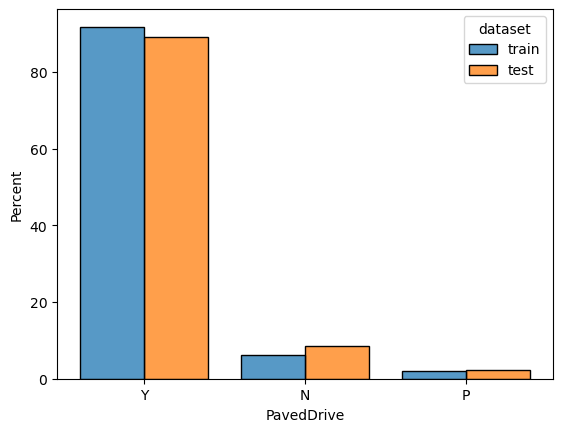

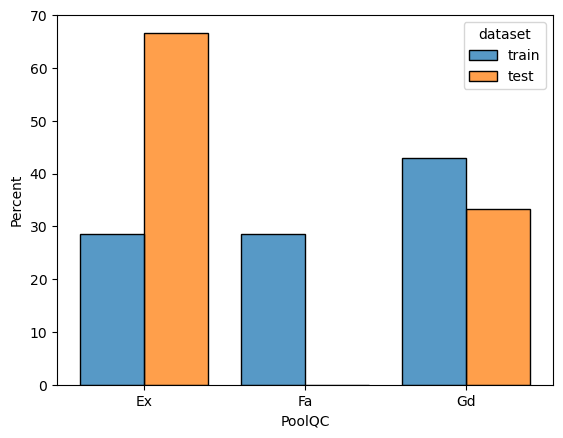

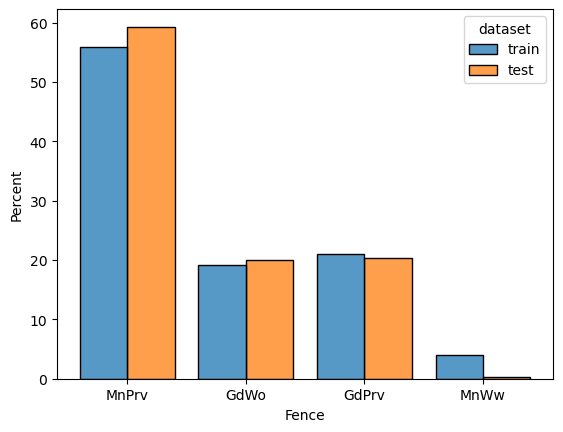

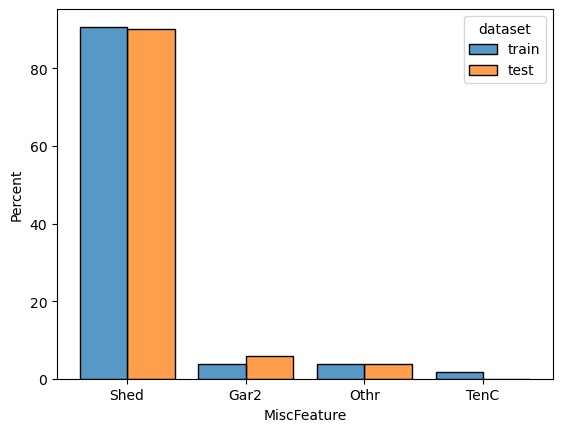

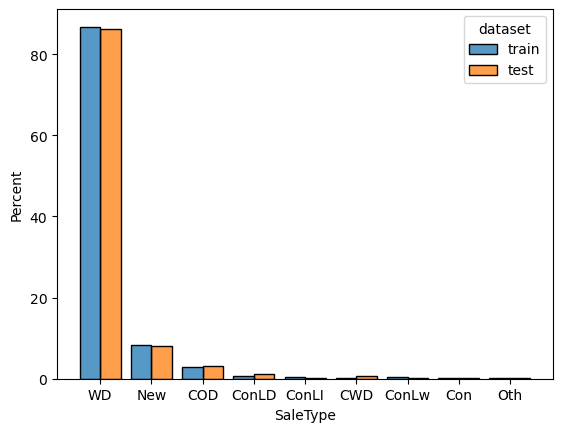

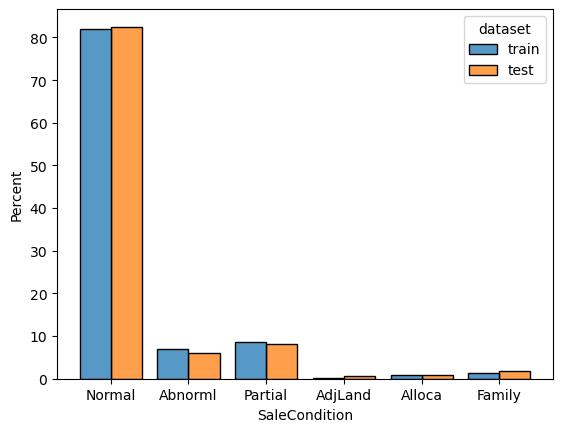

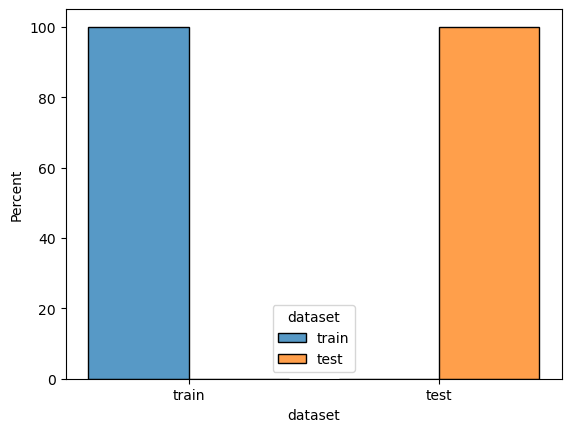

In [14]:
for col in list(df_concat.describe(include="O")):
    if df_train[col].nunique() <= 20:
        sns.histplot(data=df_concat, x=col, hue="dataset", multiple="dodge", stat='percent', shrink=0.8, common_norm=False)
        plt.show()

### Influence of training and test dataset for numerical features

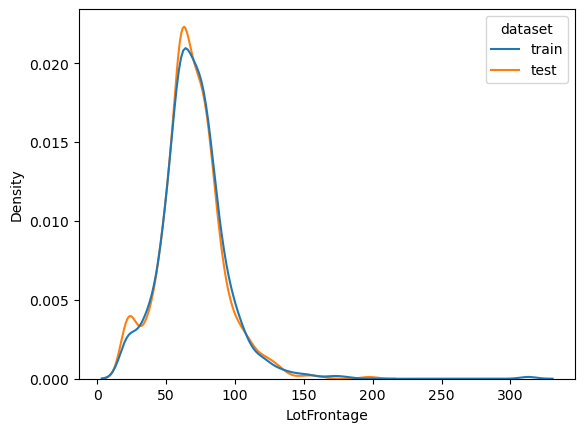

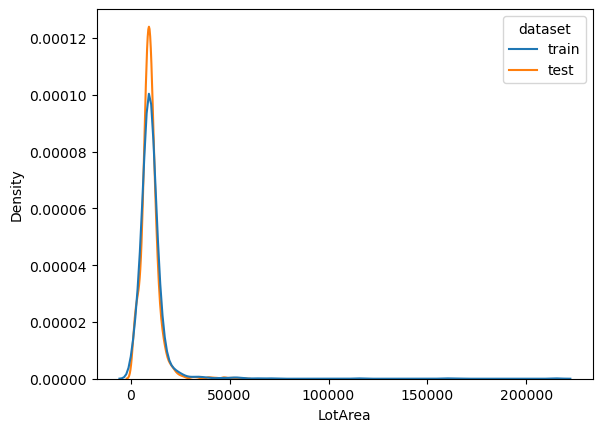

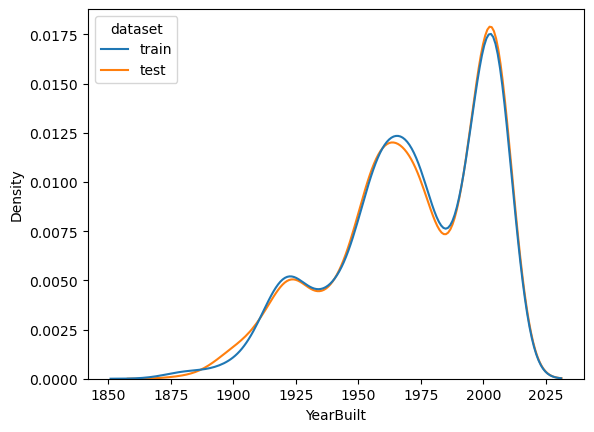

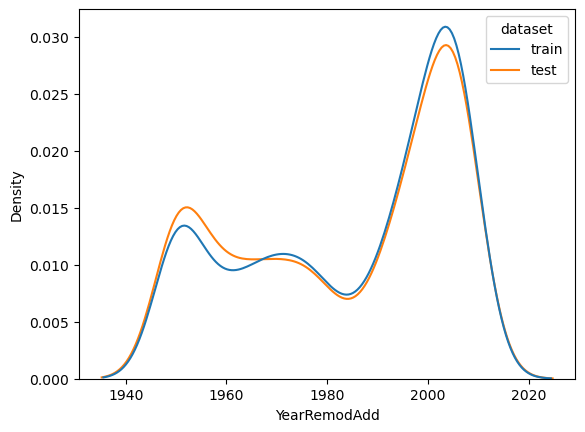

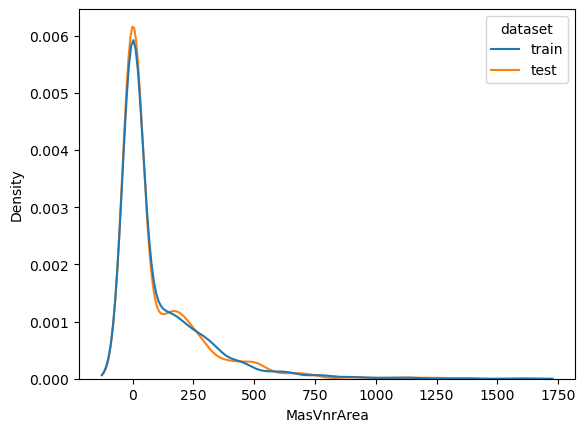

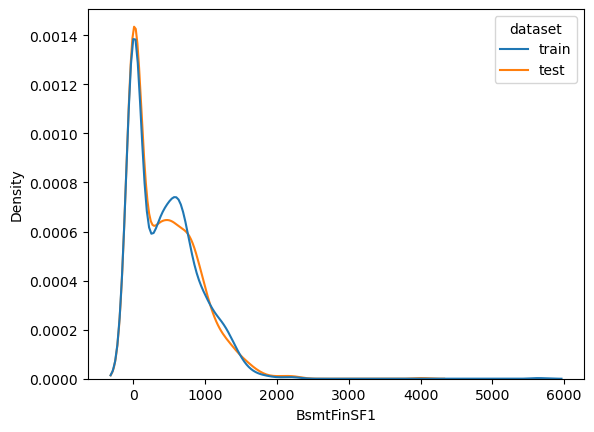

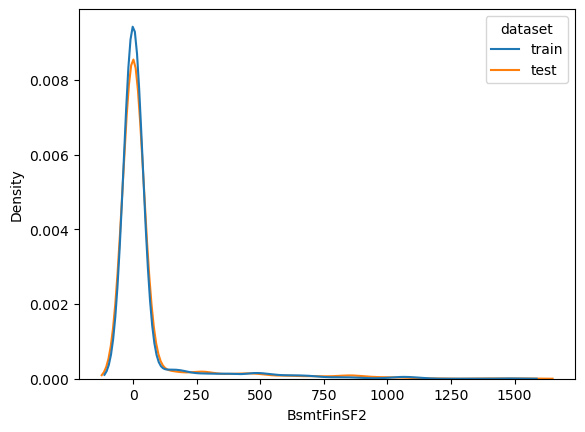

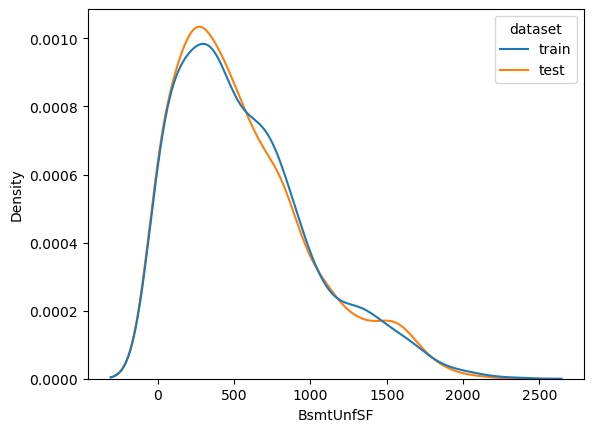

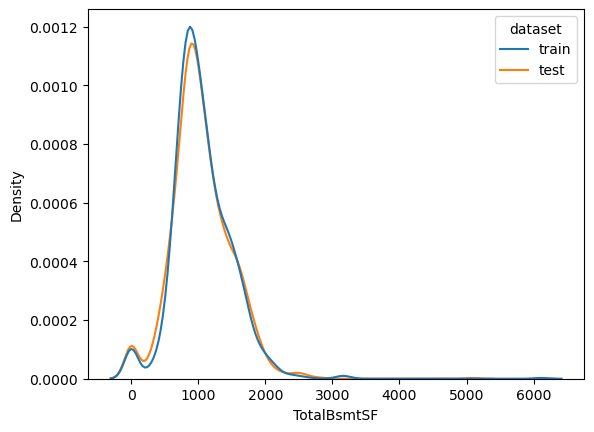

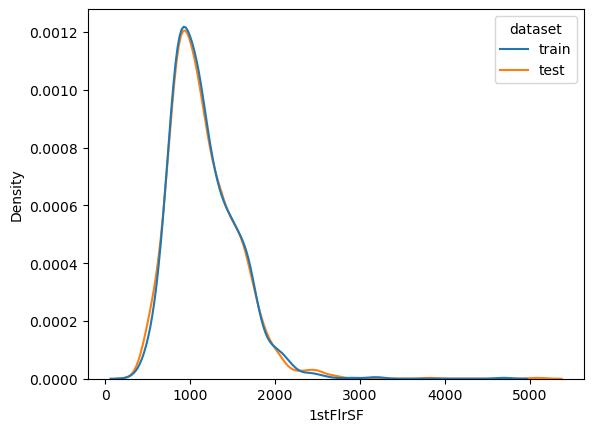

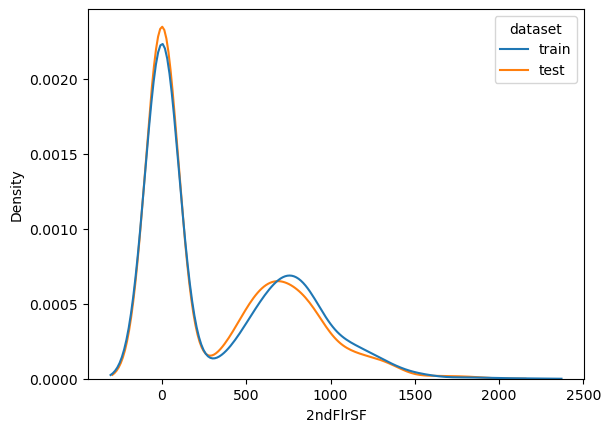

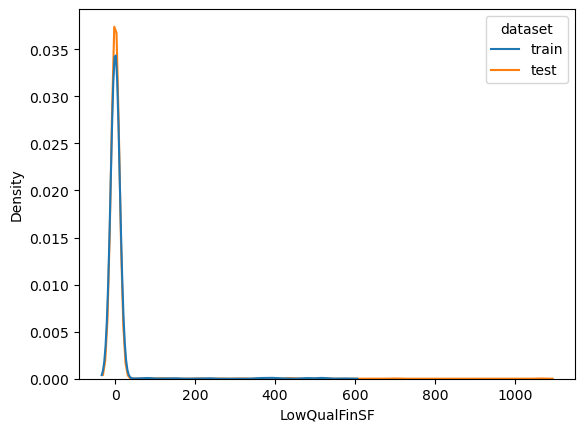

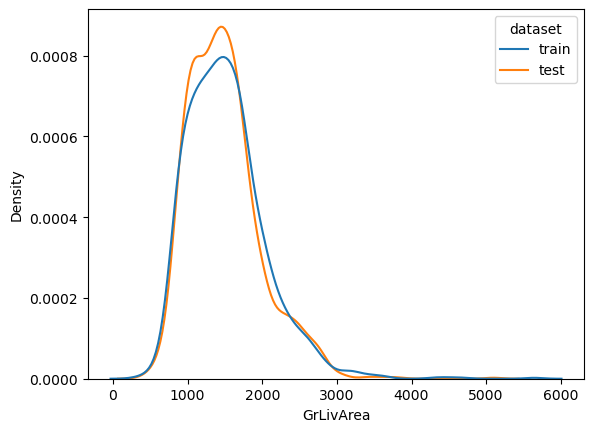

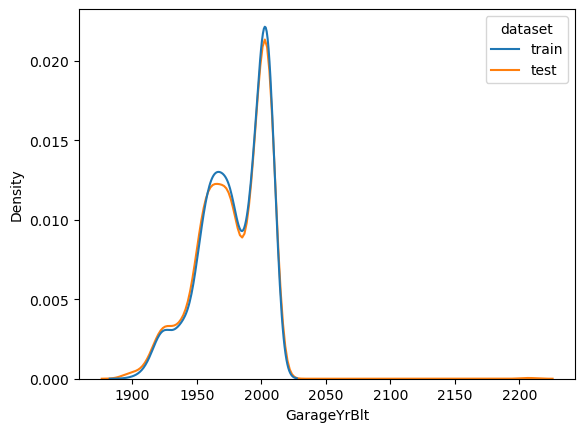

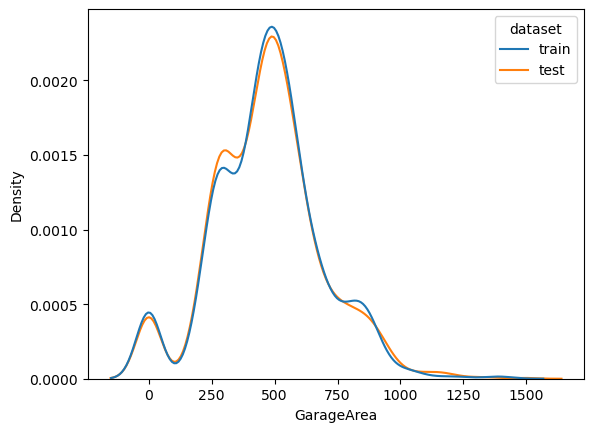

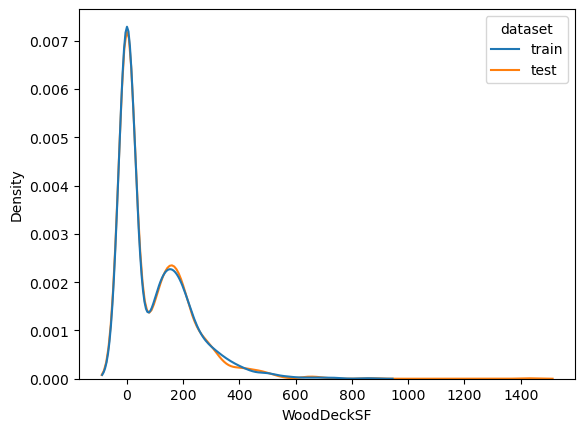

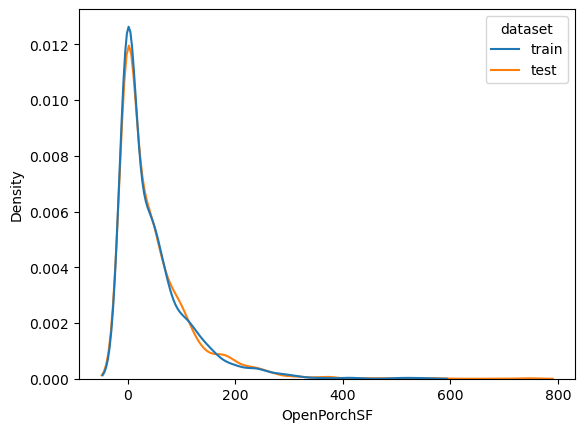

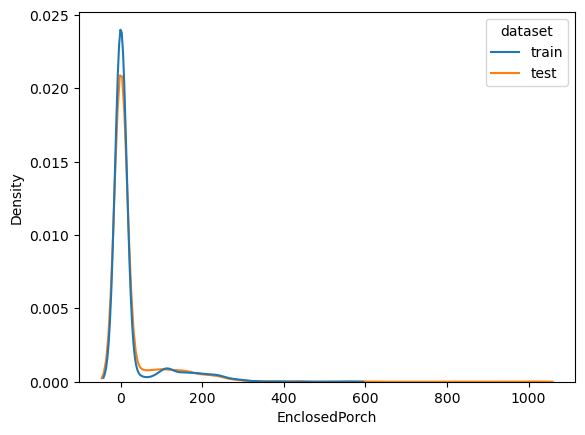

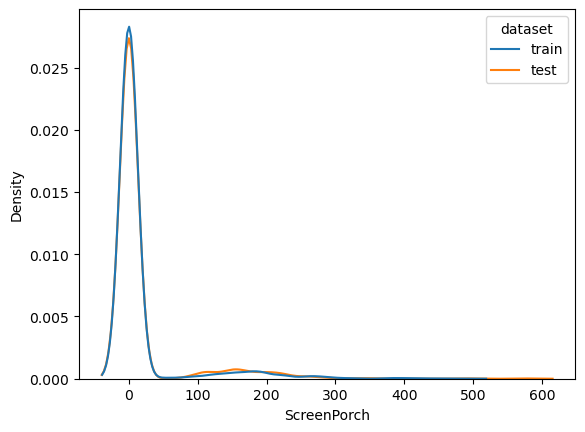

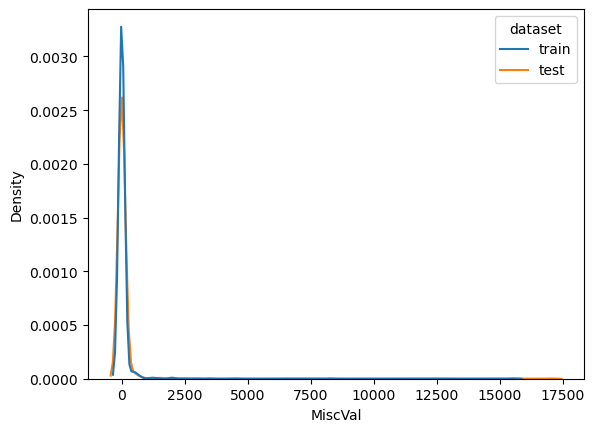

E:\programs\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


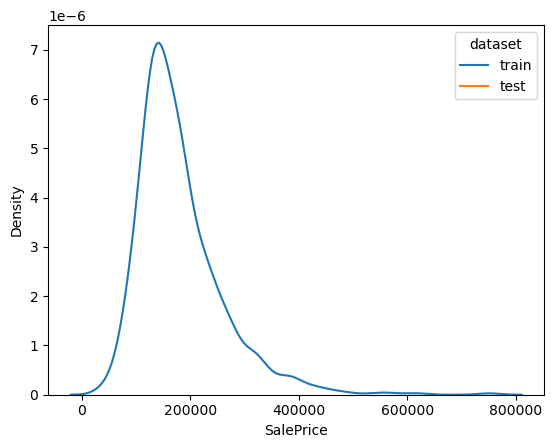

In [15]:
for col in list(df_concat.describe()):
    if df_train[col].nunique() > 20:
        sns.kdeplot(data=df_concat, x=col, hue="dataset", common_norm=False)
        plt.show()

### Influence of training and test dataset for ordinal features

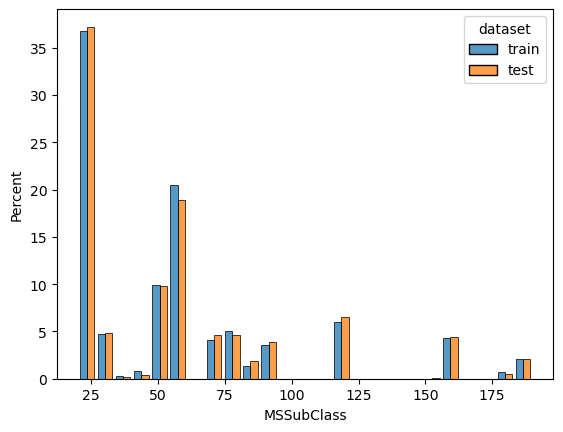

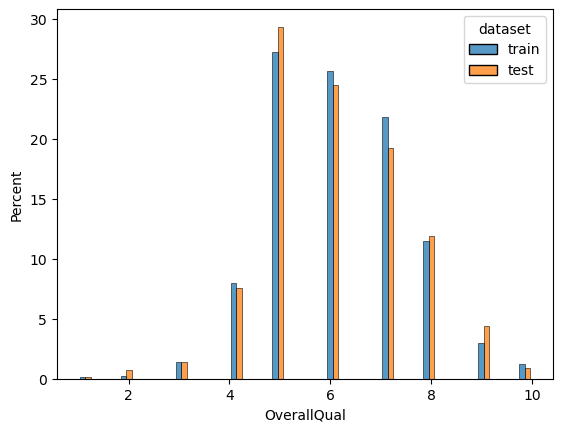

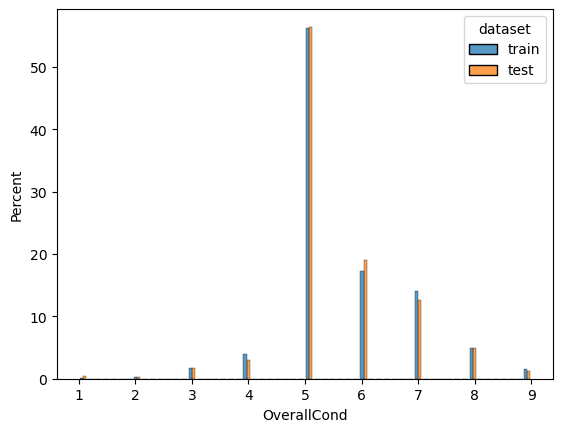

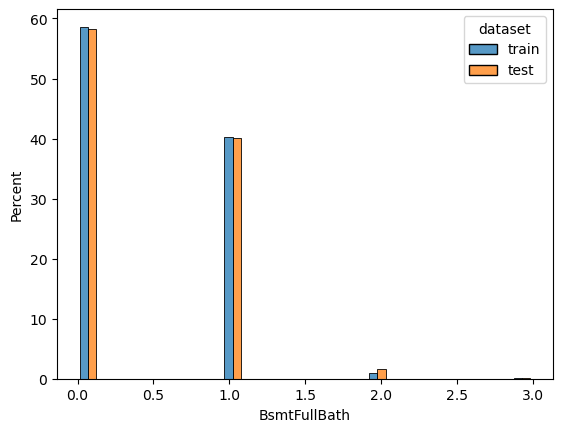

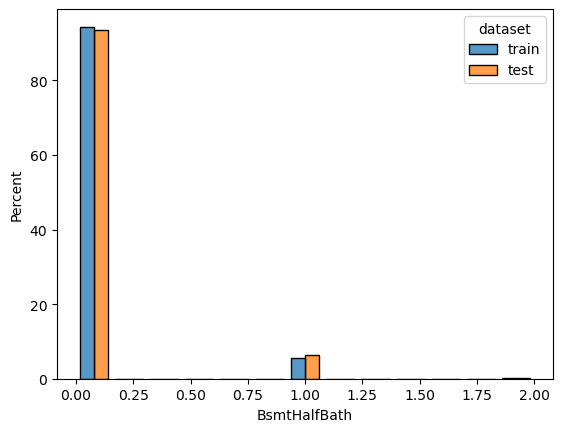

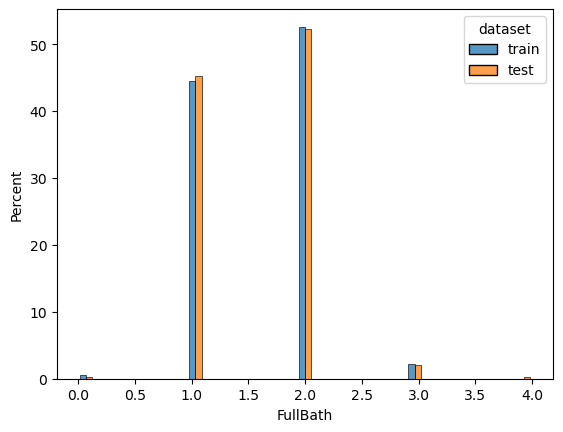

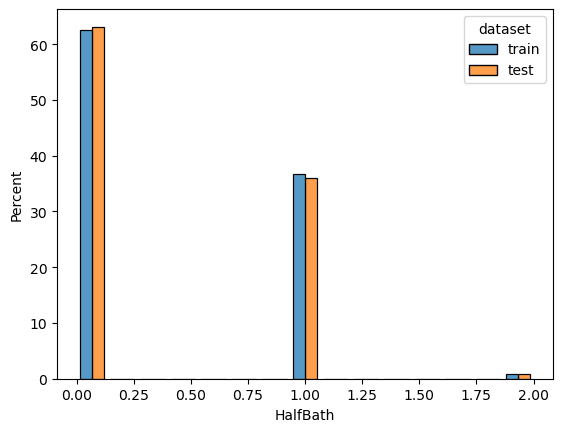

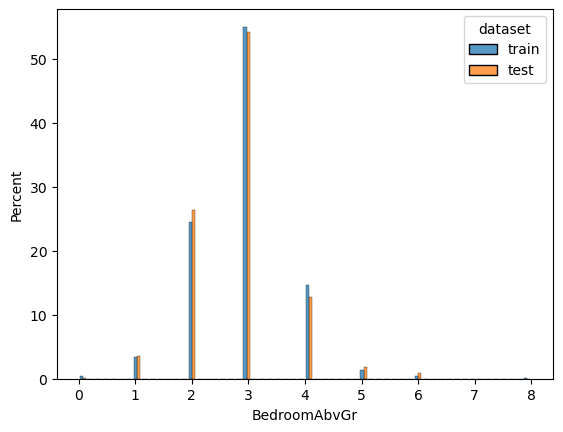

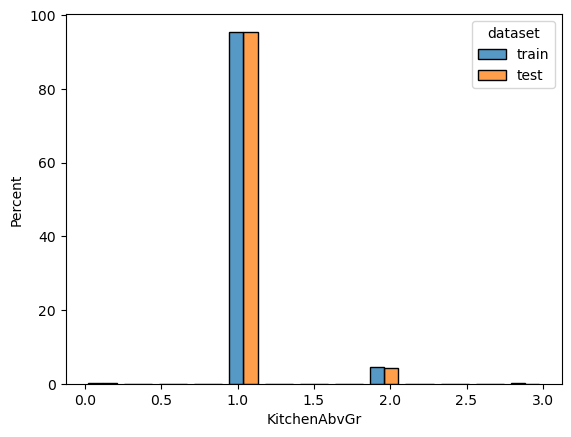

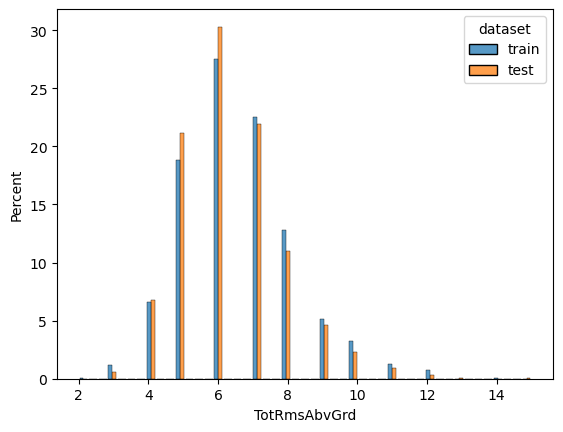

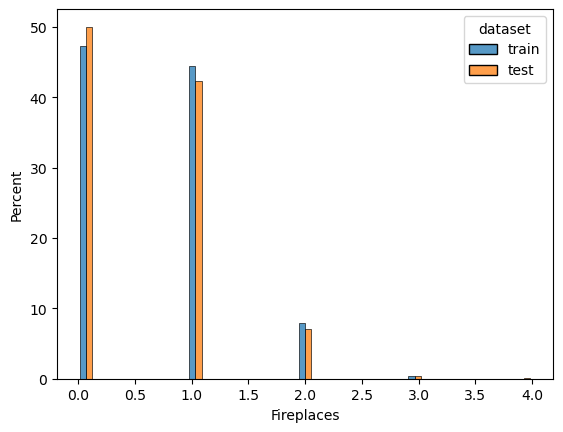

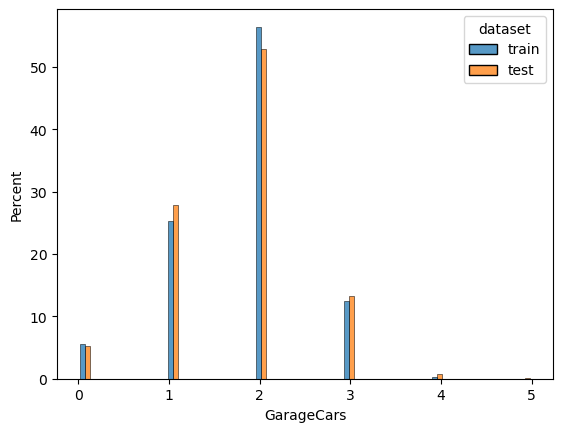

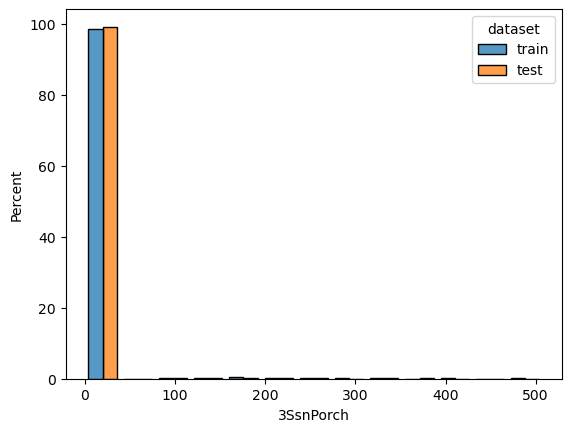

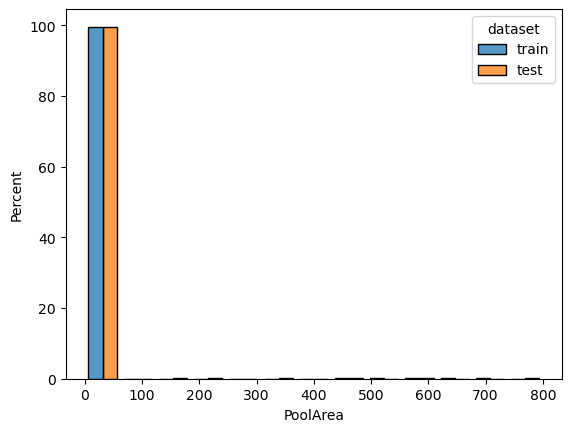

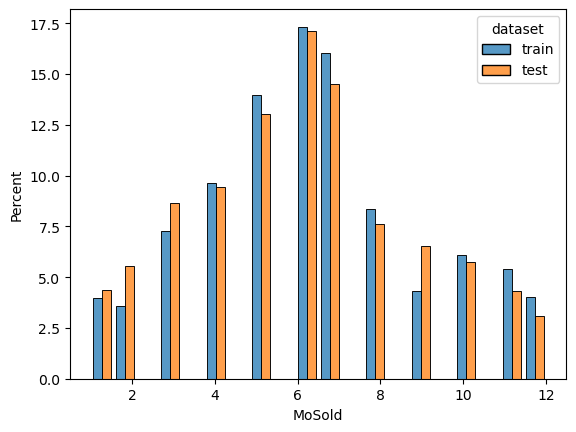

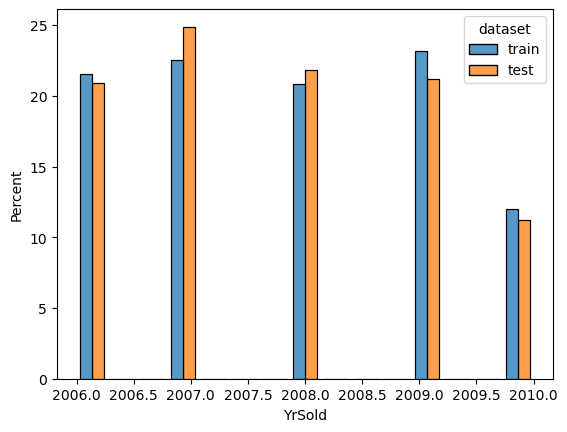

In [16]:
for col in list(df_concat.describe()):
    if df_train[col].nunique() <= 20:
        sns.histplot(data=df_concat, x=col, hue="dataset", multiple="dodge", stat='percent', shrink=0.8, common_norm=False)
        plt.show()

## Visualize the Influence of all Categories on the Sales Price
To save all images as one PDF use img2pdf and the following code in the terminal:

img2pdf *png -o output_all_pngs.pdf

In [17]:
for col in list(df_train.describe(include="O")):
    graph = sns.catplot(x=col, y="SalePrice", data=df_train, kind="box") # use kind="box" for many samples
    
    graph.figure.set_size_inches(18.5, 10.5)
    graph.savefig("influence_categorical_features/{}.png".format(col))
    plt.close()

## Visualize the Influence of all Numerical Features on the Sales Price
To save all images as one PDF use img2pdf and the following code in the terminal:

img2pdf *png -o output_all_pngs.pdf

In [18]:
import scipy.stats as stats

for col in list(df_train.drop("SalePrice", axis=1).describe()):
    graph = sns.jointplot(data=df_train, x=col, y="SalePrice", kind="reg")
    df_ = df_train[[col, "SalePrice"]].dropna(axis='index')
    r, p = stats.pearsonr(df_[col], df_["SalePrice"])
    phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
    graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])
    
    graph.figure.set_size_inches(18.5, 10.5)
    graph.savefig("influence_numerical_features/{}.png".format(col))
    plt.close()